# Python Machine Learning 1 - Linear Regression

<p><a name="sections"></a></p>


## Sections

- <a href="#linear">Linear Regression</a><br>
 - <a href="#coeff">The Coefficients</a><br>
 - <a href="#error">The Errors</a><br>
   - <a href="#assumption">The Basic Assumptions on Linear Regression</a><br>
 - <a href="#estimate">Estimating the Coefficients</a><br>
    - <a href="#residual">Residuals</a><br>
    - <a href="#formula">The Formula for the Coefficients</a><br>
 - <a href="#rsquare">Evaluating the Model: Coefficient of Determination</a><br>
 - <a href="#reg_sklearn">Linear Regression in Scikit-Learn</a><br>
    - <a href="#ex1">Exercise: Simple Linear Regression Lab</a><br>
- <a href="#multi_reg">Multiple Linear Regression - Model</a><br>
 - <a href="#matrix">Least Square in Matrix Notation</a><br>
 - <a href="#multi_sklearn">Multiple Linear Regression in Scikit-Learn</a><br>
    - <a href="#ex2">Exercise: Advertising Data</a><br>
 - <a href="#case">Case Study</a><br>
    - <a href="#descriptive">Descriptive Statistics</a><br>
    - <a href="#ex3">Exercise: Descriptive Statistics</a><br>
    - <a href="#dummy">Categorical Input Variables</a><br>
    - <a href="#ex4">Exercise: Dummy Variables</a><br>
- <a href="#stats">Statmodels</a><br>

In [1]:
#### Loading the packages to be used
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

<p><a name="linear"></a></p>
## Linear Regression

Linear regression is a supervised machine learning method that aims to uncover the relationship between continuous variables:

- One or more explanatory/independent/input variables $X_1, X_2,..., X_p$.
- The response/dependent/output variable Y.


**Simple linear regression** in a special case when there is only one explanatory variable $X$. Then the relation can be represented quantitatively by:
$$
Y = \beta_0 + \beta_1X + \epsilon
$$

- $\beta_0 \text{ and } \beta_1$ are two unkown constants that represent the intercept and slope.
- $\epsilon$ is called the error term.  This represents the deviation of the value from the linearity.



For example, Okun's law in macroeconomics can be modeled by simple linear regression. Here the GDP growth is presumed to be in a linear relationship with the changes in the unemployment rate.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/77/Okuns_law_quarterly_differences.svg">
*Source: https://en.wikipedia.org/wiki/Simple_linear_regression*

- Okun's law can be modeled as

$$ GDP = \beta_0 + \beta_1 ( \text{unemployment rate}) + \epsilon$$

<p><a name="coeff"></a></p>
### The Coefficients

Below we visualize our simple linear model with an example $Y = 1 + 0.5 X + \epsilon. \ ( \beta_0 = 1 \text{ and } \beta_1=0.5 )$

- $\beta_0 \text{ and } \beta_1$ defines the linear relation. That says, if we observe a set of n independent variables $X = (x_1, x_2, ..., x_n)$:

Populating the interactive namespace from numpy and matplotlib


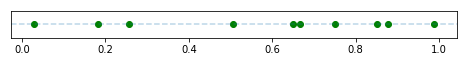

In [2]:
%pylab inline

np.random.seed(18)
N = 10
X = np.random.rand(N)
X = np.array(sorted(X))

plt.figure(figsize=(8,0.5))
plt.scatter(X, np.zeros(N), color= 'green')
plt.yticks([])
plt.ylim(-0.2, 0.2)
plt.axhline(y=0, alpha=0.3, ls='dashed')

The linear relation $Y = 1 + 0.5X$ indicates that the outcome $Y = (y_1, y_2, ..., y_n)$ should be:

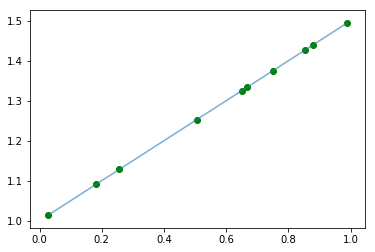

In [3]:
beta_0 = 1
beta_1 = 0.5
Y = beta_1*X + beta_0 

plt.figure(figsize=(6,4))
plt.plot(X, beta_1*X + beta_0 , alpha=0.6)
plt.scatter(X,Y, color='green')

Note that there is **NO** randomness involved. We say that $\beta_0 \text{ and } \beta_1$ are **constant**. Note that $\beta_0 \text{ and } \beta_1$ are in fact the **intercept** and the **slope** respectively.

<p><a name="error"></a></p>
### The Errors

All the randomness are attributed to $ \epsilon $. The relation $Y = 1 + 0.5X + \epsilon \text{ becomes: }$

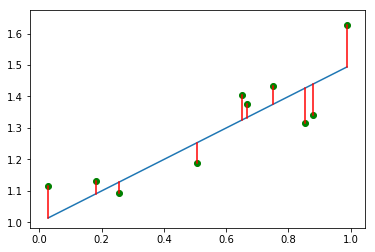

In [4]:
error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1*X + error
plt.scatter(X, Y, color='green')
plt.plot(X, beta_0 + beta_1*X)
for i in range(N):
    plt.plot([X[i], X[i]], [beta_0+beta_1*X[i], Y[i]], color='red')

<p><a name="assumption"></a></p>
#### The Basic Assumptions on Linear Regression

The basic assumptions of a simple linear model are:

- Linearity
- Normality
- Constant Variance
- Independent Errors

<p><a name="linearity"></a></p>
#### Linearity

Linearity defines the relation between $X \text{ and } Y$. As we saw in the previous plot, it is represented by $\beta_0 \text{ and } \beta_1$.

We will discuss how these two constants are estimated.

<p><a name="on_error"></a></p>
#### Assumptions on the Errors

We cannot estimate $\epsilon$ mainly because it is random. However, we can still study some properties of the randomness. The last three (except the linearity) assumptions on linear model describe what kind of randomness $\epsilon$ should be.

**Normality**

Randomness are often described by **distribution**, which can be seen only when we have a lot of samples. So let's create a much larger sample set:

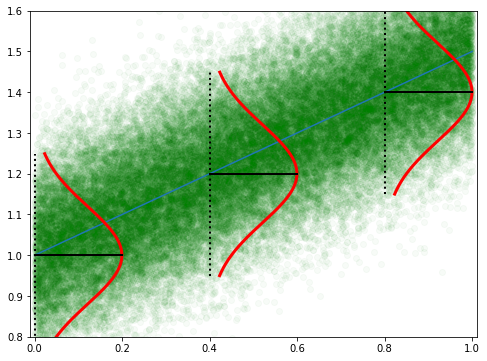

In [5]:
from scipy.stats import norm

N = int(6e4)
np.random.seed(168)
X = np.random.rand(N)
X = np.array(sorted(X))
error = np.random.normal(0, 0.12, N)
Y = beta_0 + beta_1*X + error

fig = plt.figure(figsize=(8,6))
plt.scatter(X, Y, alpha=0.03, c='green')
plt.plot(X, beta_0+beta_1*X)
plt.ylim(0.8, 1.6)
plt.xlim(-0.01, 1.01)


x_centers = np.array([0., 0.4, 0.8])
y_centers = beta_0 + beta_1*x_centers
plt_rng = np.arange(-.25, .25, 0.001)
plt_pdf = norm(0, 0.12).pdf(plt_rng)*0.06

for x, y in zip(x_centers, y_centers):
    plt.plot(x + plt_pdf, y + plt_rng, c='r', lw=3)
    plt.plot([x]*len(plt_rng), y + plt_rng, ':', c='k', lw=2)
    plt.plot([x]+list(x + plt_pdf), [y]+[y]*len(plt_rng), '-', c='k', lw=2)

(-0.1, 1.1)

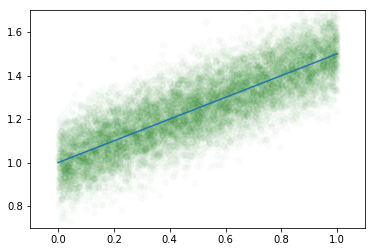

In [6]:
N = int(1e4)
np.random.seed(168)
X = np.random.rand(N)
X = np.array(sorted(X))
error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1*X + error


plt.scatter(X, Y, alpha=0.02, color='green')
plt.plot(X, beta_0+beta_1*X)
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)

- And again we visualize the error with some of the $X$:

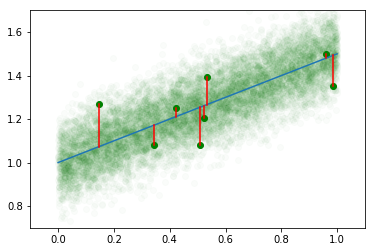

In [7]:
np.random.seed(1127)

plt.scatter(X, Y, alpha=0.02, color='green')
plt.plot(X, beta_0+beta_1*X)
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)

example = np.random.choice(np.arange(N), size=8, replace=False)
for i in example:
    plt.scatter(X[i], Y[i], alpha=1, color='green')
    plt.plot([X[i], X[i]], [beta_0+beta_1*X[i], Y[i]], color='red')

- The normality assumption means if we sketch the histogram of the errors, it looks like:

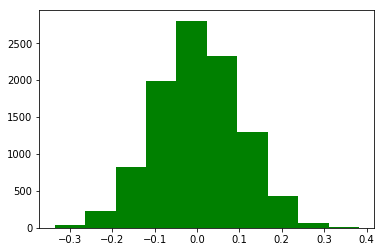

In [8]:
plt.hist(error, color='green', bins=10)
print('')

Note that the **mean** and the **standard deviation** of our errors are:

In [9]:
print('The mean of the errors is %.4f' %np.mean(error))
print('The standard deviation of the errors is %.4f' % np.std(error))

The mean of the errors is 0.0018
The standard deviation of the errors is 0.0995


We can compare the normalized histogram and the pdf curve of a normal distribution. 

- Note the difference between the `y` axes of the plot below and of the previous one.

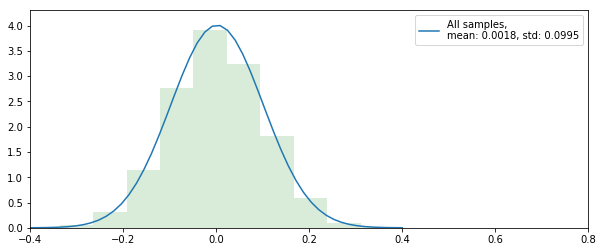

In [10]:
plt.figure(figsize=(10,4))
plt.xlim(-0.4, 0.8)
plt.ylim(0, 4.3)
plt.hist(error, color='green', bins=10, normed=True, alpha=0.15)
my_norm = stats.norm(np.mean(error), np.std(error)).pdf
label = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(error), np.std(error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), label=label)
plt.legend()

**Constant Variance and Independent Errors**

Both of the other two conditions:
- constant variance
- independent errors

indicate that the error of every observation obey the same distribution. **Why?**



**How do we check that?**

- There is no way to talk about the distribution of **one** observation. However, if all the errors obey the same distribution, we should obtain the same (or very similar) normal curve when we randomly choose a (large enough) subset from the observations.

For example, let's pick the observations with $X$ less than 0.5 and compare the normal curve obtained from them with the one obtained from all the observations. You are invited to change the range of observations selected below and make the same comparison.

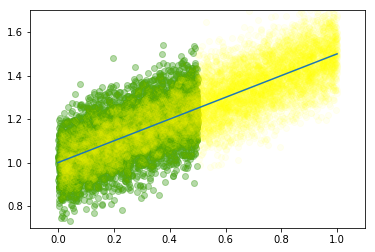

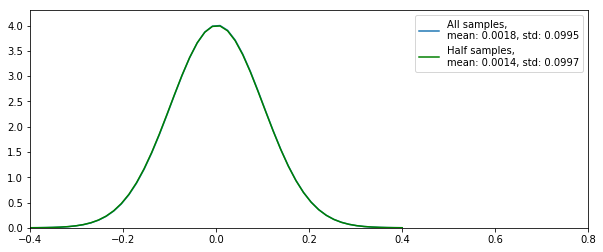

In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

index = np.where(np.logical_and(X>0, X<0.5))
sub_X = X[index]
sub_Y = Y[index]

plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)
plt.scatter(sub_X, sub_Y, alpha=0.3, color='green')
plt.scatter(X, Y, alpha=0.05, color='yellow')
plt.plot(X, beta_0+beta_1*X)

sub_error = sub_Y - (beta_0 + beta_1*sub_X)

plt.figure(figsize=(10,4))
plt.xlim(-0.4, 0.8)
plt.ylim(0, 4.3)

my_norm = stats.norm(np.mean(error), np.std(error)).pdf
label = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(error), np.std(error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), label=label)

my_norm = stats.norm(np.mean(sub_error), np.std(sub_error)).pdf
label = 'Half samples,\nmean: %.4f, std: %.4f' % (np.mean(sub_error), np.std(sub_error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), color='green', label=label)

plt.legend()

- We may also just randomly select the subset and make the same comparison. Again you are invited to change the amount of observations selected below.

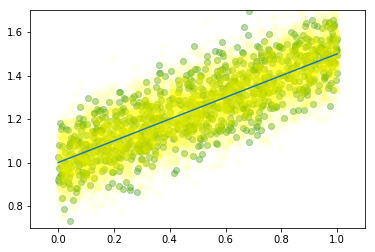

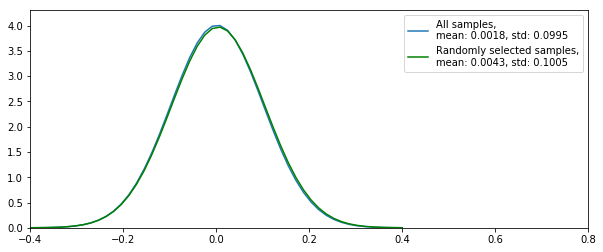

In [12]:
#### You may run the code below multiple times; each time we run it we are selecting different 
#### subset. You might also change the size of subset.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


size = 1000
index = np.random.choice(N, size, replace=False)
sub_X = X[index]
sub_Y = Y[index]
sub_error = sub_Y - (1 + 0.5*sub_X)

sub_X = X[index]
sub_Y = Y[index]

plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)
plt.scatter(sub_X, sub_Y, alpha=0.3, color='green')
plt.scatter(X, Y, alpha=0.05, color='yellow')
plt.plot(X, beta_0+beta_1*X)

plt.figure(figsize=(10,4))
plt.xlim(-0.4, 0.8)
plt.ylim(0, 4.3)

my_norm = stats.norm(np.mean(error), np.std(error)).pdf
label = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(error), np.std(error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), label=label)

my_norm = stats.norm(np.mean(sub_error), np.std(sub_error)).pdf
label = 'Randomly selected samples,\nmean: %.4f, std: %.4f' % (np.mean(sub_error), np.std(sub_error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), color='green', label=label)

plt.legend()

<p><a name="estimate"></a></p>
### Estimating the Coefficients

In general, $\beta_0 \text{ and } \beta_1$ are unknown, what we have is a set of observations $X \text{ and } Y$. Essentially what we do is to **try** all the possible pairs of $\beta_0 \text{ and } \beta_1$, and find the one defining the linear model most similar to the observations.

- We again illustrate the process with visualization. For simplicity, we stick to 10 observations. This is what we have from observation:

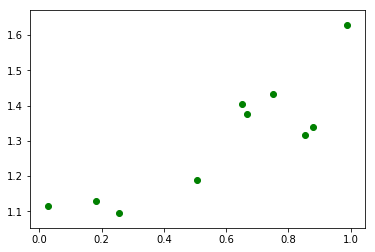

In [13]:
np.random.seed(18)
N = 10
X = np.random.rand(N)
X = np.array(sorted(X))

error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1*X + error
plt.scatter(X, Y, color='green')

<p><a name="residual"></a></p>
#### Residuals

- We then start trying out some pair of $( \tilde{\beta}_0, \tilde{\beta}_1) \text{ , say, } (0.5, 1)$.

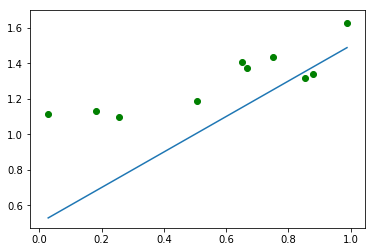

In [14]:
plt.scatter(X, Y, color='green')
plt.plot(X, 0.5 + X)

How different is the model from the observations?

- We may again consider the difference between the observation and the model:
$$
e = Y - (\tilde{\beta_0} + \tilde{\beta_1} X) 
$$

This difference vector is called the **residual**.

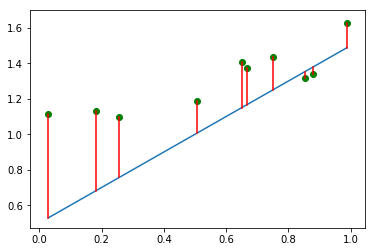

In [15]:
plt.scatter(X, Y, color='green')
plt.plot(X, 0.5 + X)
for i in range(N):
    plt.plot([X[i], X[i]], [0.5+X[i], Y[i]], color='red')

To quantify the difference between the model and the observations, we use the **residual sum of squares**, or **RSS**. It is defined by:
$$
\text{ } \\
\text{Denote } e = (e_1, e_2, e_3, ..., e_n) \\
\text{ } \\
\begin{align*} 
RSS(\tilde{\beta_0}, \tilde{\beta_1})=& e_1^2 + e_2^2 + ... + e_n^2
\\ 
=&\sum_{i=1}^{n}(y_i-\tilde{\beta}_0-\tilde{\beta}_1x_i)^2
\end{align*}
$$

- Therefore RSS depends on $( \tilde{\beta_0}, \tilde{\beta_1})$.
- Below we see that indeed the model with least RSS is most similar to the observations.

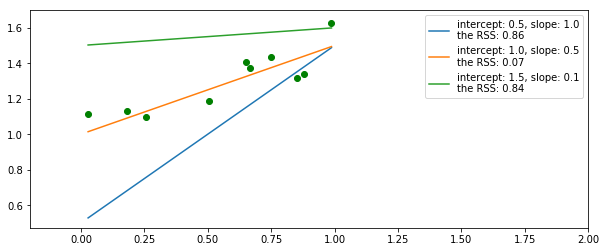

In [16]:
fig = plt.figure(figsize=(10, 4))
plt.scatter(X, Y, color='green')

plt.xlim(-0.2, 2)

for b0, b1 in [(0.5, 1), (1, 0.5), (1.5, 0.1)]:
    res = Y - (b0 + b1*X)
    text = 'intercept: %.1f, slope: %.1f\nthe RSS: %.2f' %(b0, b1, np.sum(res**2))
    plt.plot(X, b0 + b1*X, label = text)

plt.legend()

**Question** $( \tilde{\beta_0}, \tilde{\beta_1})=(1, 0.5)$ is the best among three. Is it actually the best possible pair?

The coefficient that really minimizes RSS is denoted by $(\hat{\beta_0}, \hat{\beta_1})$. And the model is denoted by:

$$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1X$$

- The symbol $\hat{}$ denotes an estimated value. The coefficients $(\hat{\beta_0}, \hat{\beta_1})$ are called the **ordinary least square estimator**, (**OLS**). Once we have the estimators and a new observed $X$, the $Y$ can be predicted by passing $X$ into the formula above.

<p><a name="formula"></a></p>
#### The Formula for the Coefficients

- Minimizing the RSS characterizes the coefficients $(\hat{\beta_0}, \hat{\beta_1})$. We will not discuss how they can be obtained, though it is actually the standard optimization problem with differentiation. $(\hat{\beta_0}, \hat{\beta_1})$ actually admits a closed form:

$$
\begin{align}
\text{ }\\
\hat{\beta}_1&=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}
\\
\hat{\beta}_0&=\bar{y}-\hat{\beta}_1\bar{x}\\
\text{ }\\
\text{wh}&\text{ere } \bar{y} \text{ and } \bar{x} \text{ are the sample means of } x \text{ and } y, \text{ respectively.} 
\end{align}
$$

- Of course, if you don't care about math, Python will find the coefficients for us.

<p><a name="rsquare"></a></p>
### Evaluating the Model: Coefficient of Determination

- Once we fit a linear model, how should we assess the overall accuracy of the model?

- The usual way to measure the overall accuracy of a simple linear model is to use the **coefficient of determination**.

- The coefficient of determination, denoted $R^2$, measures how well data fits a model.

- $R^2$ is defined as
$$R^2=1-\frac{RSS}{TSS}$$
  where TSS is the total sum of squares:
$$TSS=\sum_{i=1}^{n}(y_i-\bar{y})^2$$

- RSS (The areas of the blue squares) represent the squared residuals with respect to the linear regression. 

- TSS (The areas of the red squares) represent the squared residuals with respect to the average value and is fixed if data is known. (Can you tell why?)

- Therefore the coefficient of determination is a number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg" style="width: 500px;">
*Source: https://en.wikipedia.org/wiki/Coefficient_of_determination. The areas of the red squares represent TSS. The areas of the blue squares represent RSS.
*

- Given a dataset, TSS is determined, the fitted model has the minimum RSS:

  - $R^2 = 1$ indicates that the regression line perfectly fits the data
  
  - $R^2 = 0$ indicates that the line does not fit the data at all.
  
  - In general, the better the linear regression fits the data in comparison to the simple average, the closer the value of $R^2$ is to 1.

<p><a name="reg_sklearn"></a></p>
### Linear Regression in Scikit-Learn

In [17]:
#### In case you change the variables, let create them again:
#### Loading the packages to be used
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

beta_0 = 1
beta_1 = 0.5

np.random.seed(18)
N = 10
X = np.random.rand(N)
X = np.array(sorted(X))
error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1*X + error

- To fit a linear model with scikit-learn, first we need to import **`linear_model`** from **`sklearn`**. 

- Then we create a **`LinearRegression`** instance, which uses the **`OLS`** method to fit a linear model.

In [18]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

Some attributes and methods we will use for linear regression:

- `coef_`: Estimated coefficients ($\hat{\beta}_1$,...) for the linear regression problem.
- `intercept_`: Independent term ($\hat{\beta}_0$) in the linear model.
- `fit(X, y)`: Fit linear model.
- `predict(X)`: Predict using the linear model
- `score(X, y)`: Returns the coefficient of determination $R^2$ of the prediction.


**Fitting**

Next we fit a simple linear model with the data set.

- Once we fit the model, the coefficients can be accessed via `coef_` and `intercept_` attributes.

In [19]:
ols.fit(X.reshape(-1,1), Y)   #### What happen if we remove the 'reshape' method? 
print("beta_1: %.3f" %ols.coef_)
print("beta_0: %.3f" %ols.intercept_)

beta_1: 0.457
beta_0: 1.040


/Users/lukelin/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


**Predicting**

- To make prediction with the fitted model, we simply pass a **column vector** to `predict()`.

[1.05251398 1.12263584 1.15694823 1.27043576 1.33662371 1.3438067
 1.38218682 1.42881625 1.44085917 1.49077568]


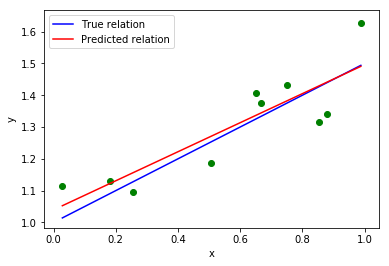

In [20]:
#### For convenience, let's update X
X = X.reshape(-1,1)
print(ols.predict(X))

plt.plot(X, beta_0 + beta_1*X, c='b', lw=1.5, label='True relation')
plt.plot(X, ols.predict(X), c='r', lw=1.5, label='Predicted relation')
plt.scatter(X, Y, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)

**Evaluating Models**

- In regression method, `score()` method returns the coefficient of determination $R^2$ of the prediction.

- The following code calculates the RSS and $R^2$. 

In [21]:
#### predict: prediction
print("RSS: %.2f" % np.sum((Y - ols.predict(X)) ** 2))
## score: the R^2 of the fitted model
print('R^2: %.2f' % ols.score(X, Y))

RSS: 0.06
R^2: 0.75


- The RSS is 0.06, which is better than passing any other pair into the function $RSS$.

- The $R^2$ is 75%, which means that 75% of the variance of Y can be explained by variable X.

<p><a name="ex1"></a></p>
#### Exercise  - Simple Linear Regression Lab

Now let’s apply the method to solve a real world problem.

- In this exercise, you will implement linear regression with one variable to predict profits for a food truck.

- The file ex1data1.csv contains the dataset for our linear regression problem. 
  - The first column is the population of a city,
  - and the second column is the profit of a food truck in that city.
  - A negative value for profit indicates a loss.


- Find the correct path to the file to load the data and use scatter plot to visualize it.

Text(0,0.5,'Profit')

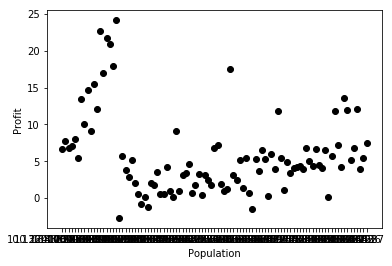

In [22]:
import pandas as pd
# give the path to the file 
path_to_file = "./data/ex1data1.csv"
data = pd.read_csv(path_to_file, header=None, names=["Population", "Profit"])

x = data[["Population"]]
y = data["Profit"]
## do a scatter plot with data x and y
plt.scatter(x, y, c='k')
plt.xlabel('Population')
plt.ylabel('Profit')

- Create a LinearRegression instance and use `fit()` function to fit the data.

In [23]:
#### Your code here

- Add a fitted regression line using `plot()` method and see if it fits the data points.

In [24]:
#### Your code here

- Calculate the following values with your fitted model:

- What are the coefficients $\beta_0$ and $\beta_1$?
- What is the residual sum of squares (RSS)?
- What is the coefficient of determination ($R^2$)?

In [25]:
#### Your code here

#### Solutions

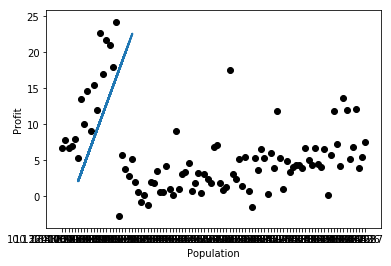

beta_0: -3.896
beta_1: 1.193
RSS: 868.53
R^2: 0.70


In [26]:
#1
from sklearn import linear_model
ols = linear_model.LinearRegression()
## fit your linear model with fit() function
ols.fit(x, y)


#2
## plot the fitted line
plt.plot(x, ols.predict(x), lw=2)
## plot the data points
plt.scatter(x, y, c='k')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()


#3
# find beta_0 with .intercept_ attribute
b_0 = ols.intercept_
# find beta_1 with .coef_ attribute
b_1 = ols.coef_
# calculate RSS using sum(y - predicted y)^2
rss = np.sum((y-ols.predict(x)) ** 2)
# calculate the score of fit
r_2 = ols.score(x, y)
print("beta_0: %.3f" %b_0)
print("beta_1: %.3f" %b_1)
print('RSS: %.2f' %rss)
print('R^2: %.2f' %r_2)

<p><a name="multi_reg"></a></p>
## Multiple Linear Regression - Model

- In reality, the output Y often depends on multiple input variables. For example, suppose we would like to study the dependence of *Income* on both *Years of Education* and *Seniority*. The since there are two independent variables, the linear model can no longer be represented by a line -- but a **plane**:

<img src="http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/MultipleLinearRegression-Plane.png" style="height: 300px;">
*Source: James et al. Introduction to Statistical Learning (Springer 2013)*

- In general, if the output $Y$ depends on more than one input variable, say $X_1$, $X_2$, ... $X_p$, then we need to generalize our linear model as

$$\hat{Y}=\hat{\beta}_0+\sum_{i=1}^p\hat{\beta}_iX_i$$

- It is very common that we include the constant 1 in $X$ and use the notation

$$\hat{\beta}=(\hat{\beta_0}, \hat{\beta_1}, ... ,\hat{\beta_p})^T$$
$$X=(1, X_1, ..., X_p)$$

- Note that $X \text{ now becomes a } N\times (p+1)$ matrix. Then we can write the model in a simple vector form as an inner product:

$$\hat{Y}=X\hat{\beta}$$

<p><a name="matrix"></a></p>
#### Least Sqaure in Matrix Notation

The matrix notation is convenient for estimate:

- **residual**: In matrix notation, the RSS can be written as:

$$RSS(\beta)=(Y-X\beta)^T(Y- X\beta)$$

- **fitting**: Again differentiating RSS with respect to $\beta \text{ gives}:

$$\hat{\beta}=(X^TX)^{-1}X^T Y$$

- **Note**: when two or more input variables are highly correlated with each other, then $X^T X$ is close to singular and the solution will be unstable - any tiny fluctuations of data will cause huge changes of the model.

<p><a name="multi_sklearn"></a></p>
### Multiple Linear Regression in Scikit-Learn
We create a random data set of two independent variables using the model:

$$Y = 2 - 7.0X_1 + 5.0X_2 + \epsilon$$

In [27]:
np.random.seed(1)
N = 30
## generate a random array with 2 columns
beta = np.array([2, -7, 5])
x_m = np.random.randn(N, 2)
y_m = np.dot(np.append(np.ones((N,1)), x_m, axis=1), beta) + np.random.randn(N)*4

Let’s visualize the data set in both 2D and 3D: 

Text(0.5,0,'X_2')

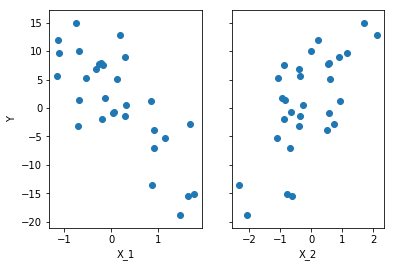

In [28]:
## use subplots to make two scatter plots side by side
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x_m[:,0], y_m)
ax2.scatter(x_m[:,1], y_m)
ax1.set_xlabel('X_1')
ax1.set_ylabel('Y')
ax2.set_xlabel('X_2')

Text(0.5,0,'Y')

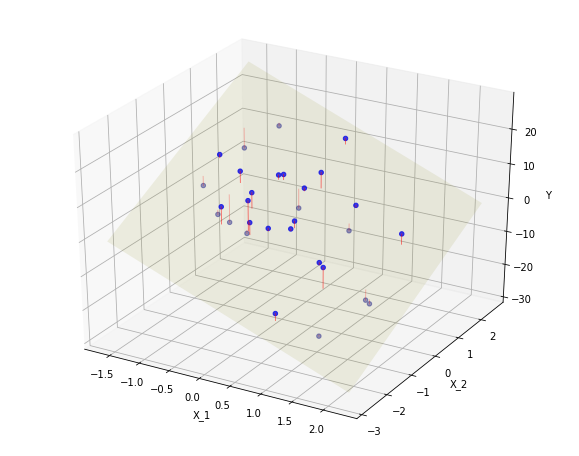

In [29]:
## 3D scatter plot

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
# plot the data points
X = np.array(list(map(lambda x: [1] + list(x), x_m)))
up = np.where(y_m >= np.sum(X*beta, axis=1))[0]
down = np.where(y_m < np.sum(X*beta, axis=1))[0]
ax.scatter(x_m[up,0], x_m[up,1], y_m[up], c='blue', alpha=.8)
ax.scatter(x_m[down,0], x_m[down,1], y_m[down], c='Darkblue', alpha=.4)

# plot the error bars
ax = fig.gca(projection='3d')
x_up = x_m[up,:]; y_up = y_m[up]
for i, j, k in zip(x_up[:,0], x_up[:,1], y_up):
    ax.plot([i,i], [j,j], [k, np.dot(beta, [1,i,j])],
            color ='r', alpha=.6, lw=0.8)
    
x_down = x_m[down,:]; y_down = y_m[down]
for i, j, k in zip(x_down[:,0], x_down[:,1], y_down):
    ax.plot([i,i], [j,j], [k, np.dot(beta, [1,i,j])],
            color ='red', alpha=.3, lw=0.8)
    
    
# plot the plane which represents the true model
x_1 = np.linspace(min(x_m[:,0])-.5, max(x_m[:,0])+.5, 25)
x_2 = np.linspace(min(x_m[:,1])-.5, max(x_m[:,1])+.5, 25)
x_1, x_2 = np.meshgrid(x_1, x_2)
x_3 = beta[1]*x_1 + beta[2]*x_2 + beta[0]
ax.plot_surface(x_1, x_2, x_3,  
                rstride=100, 
                cstride=100,
                color='yellow',
                alpha=0.1)
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')

**Fitting and Evaluating Multiple Linear Regression**

If the first variable `x` that we pass into `fit()` contains multiple columns, then a multiple linear model is returned.

In [30]:
ols.fit(x_m, y_m)
print ("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
print ("beta_0: " + str(np.round(ols.intercept_, 3)))
print ("RSS: %.2f" % np.sum((ols.predict(x_m) - y_m) ** 2))
print ("R^2: %.5f" % ols.score(x_m, y_m))

beta_1, beta_2: [-6.619  4.436]
beta_0: 2.523
RSS: 356.34
R^2: 0.83938


- Comparing with the true model $Y = 2 - 7.0X_1 + 5.0X_2 + \epsilon$, We can see the estimated coefficients are close to the true values.

**Regression with the Matrix Formula**

Let's calculate the coefficients by using the formula we just derived:
$$\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

In [31]:
import numpy as np
## transform x to a matrix
x_m = np.mat(x_m)
## y transpose convert y into a column vector
y_m = np.mat(y_m).T
## add a column of 1’s to x
x_m = np.column_stack((np.ones([x_m.shape[0], 1]), x_m))
## matrix.I returns the inverse of that matrix
(x_m.T*x_m).I * x_m.T * y_m

matrix([[ 2.52343727],
        [-6.6191147 ],
        [ 4.43620544]])

As you can see, we get exactly the same coefficients as we get from sciki-learn.

<p><a name="ex2"></a></p>
#### Exercise : Advertising data

The Advertising data includes Sales vs TV, Radio and Newspaper.
We start with importing the data and visualizing it.

In [32]:
## load data into pandas dataframe
import pandas as pd
adver = pd.read_csv('data/adver.csv', index_col=0)
adver.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


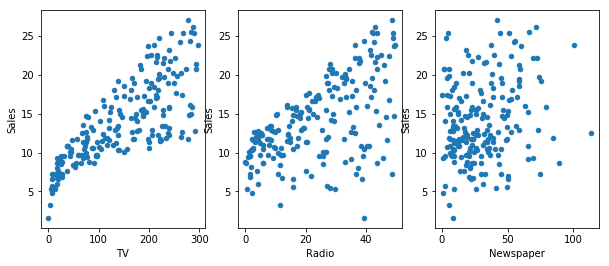

In [33]:
## Visualizing data, shown are Sales vs TV, Radio and Newspaper
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
adver.plot(ax=axes[0], kind='scatter', x='TV', y='Sales')
adver.plot(ax=axes[1], kind='scatter', x='Radio', y='Sales')
adver.plot(ax=axes[2], kind='scatter', x='Newspaper', y='Sales')

- Fit a multiple linear regression model with the 3 predictors.

- Find the estimated coefficients of your fitted model.

- What is the overall R^2?

- Given a new observation with the budgets 50 on TV, 100 on Radio and 30 on Newspaper, what is your prediction of the sale?


In [34]:
#### Your code here

The fitted model is:
$$Sale=0.046\times TV+0.189\times Radio−0.001\times Newspaper+2.939$$
 
While holding advertising budgets of Radio and Newspaper fixed, increase the budget of TV by 1 unit will result in 0.046 unit's increasing in sales.
Similarly, while holding TV and Newspaper fixed, increase Radio by 1 unit will result in 0.189 unit's increasing in sales.

#### Solution

In [35]:
## separate the input variables and output variables
X = adver[['TV', 'Radio', 'Newspaper']]  # input varialbe
Y = adver['Sales']  # output varialbe
ols.fit(X, Y)
print ("Intercept: %f" %ols.intercept_)
print ("Coefficients: %s" %str(ols.coef_))
print ("R^2: %f" %(ols.score(X, Y)))
print ("Predicted sales: %f" %(ols.predict([[50, 100, 30]])))

Intercept: 2.938889
Coefficients: [ 0.04576465  0.18853002 -0.00103749]
R^2: 0.897211
Predicted sales: 24.048999


<p><a name="case"></a></p>
## Case Study

<p><a name="descriptive"></a></p>
### Descriptive Statistics

In addition to the assumption we have for the simple linear regression, multiple linear regression also makes a key assumptions:

- Little multicollinearity in the predictors

But in reality the data is very unlikely to satisfy this assumption. Failing to satisfy the assumptions may lead to poor fit or even wrong result.

Below we will explore some basic descriptive statistics to understand the variables before fitting the linear model.

- Univariate analysis: involve the distribution of a single variable (mean, median, quartiles, standard deviation, etc.)
- Bivariate analysis: the relationship between pairs of variables (correlation, covariance, etc.)

<p><a name="ex3"></a></p>
### Exercise: Descriptive Statistics

- The Boston House Prices dataset includes 506 instance with 11 continuous variables, 1 categorical variables(RAD) and 1 binary-valued variable(CHAS)

- The dataset is available in scikit datasets package

In [36]:
from sklearn import datasets
boston = datasets.load_boston()
import pandas as pd
X_bos = pd.DataFrame(boston.data, columns=boston.feature_names)
y_bos = pd.Series(boston.target, name='MEDV')
## use head() to check the first few rows
X_bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Univariate analysis**:

- To summarize a continuous variable we will use `describe()` function

- To summarize a categorical variable we will use `value_counts()` function

In [37]:
#### Your code here

In [38]:
#### Your code here

#### Solution

In [39]:
#1
## Create another variable X which only contains continuous varialbes
X_1 = X_bos.drop('CHAS',1).drop('RAD',1)
print(X_1.describe())


#2
print(X_bos['CHAS'].value_counts())
print(X_bos['RAD'].value_counts())

             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.596783   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.647423   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         TAX     PTRATIO           B       LSTAT  
count  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043  408.237154   18.455534  356.674032   12.653063  
std      2.105710  168.537116    2.164946   91.294864    7.141062 

**Bivariate analysis and Visualization**:

- Distribution of input/output variables
- Distribution of output in each class of categorical varialbes
- Correlations between continuous variables

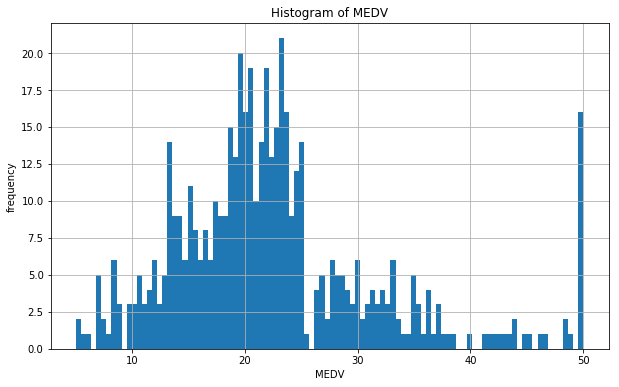

In [40]:
fig = plt.figure(figsize=(10,6))
plt.ylabel('frequency')
plt.xlabel('MEDV',)
plt.title('Histogram of MEDV')
y_bos.hist(bins=100)

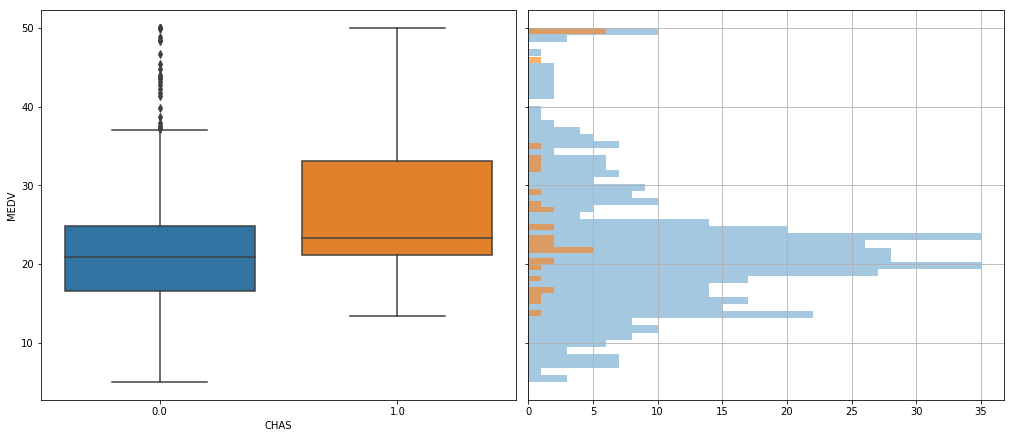

In [41]:
import matplotlib.gridspec as gridspec
import seaborn as sns

CHAS_0 = y_bos[X_bos.CHAS==0]
CHAS_1 = y_bos[X_bos.CHAS==1]

fig = plt.figure(figsize=(14,6))
gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
sns.boxplot(y=y_bos, x=X_bos.CHAS,ax=ax1)
ylim = ax1.get_ylim()
CHAS_0.hist(orientation='horizontal',bins=50,alpha=0.4,ax=ax2)
CHAS_1.hist(orientation='horizontal',bins=50,alpha=0.6,ax=ax2)
ax2.set_ylim((ylim[0], ylim[1]))
for tick in ax2.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = False
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0)

- CHAS=1 has higher housing value than CHAS=0
- Instances with CHAS=0 is much more than CHAS=1

Below we plot the distribution of MEDV in each class of RAD.

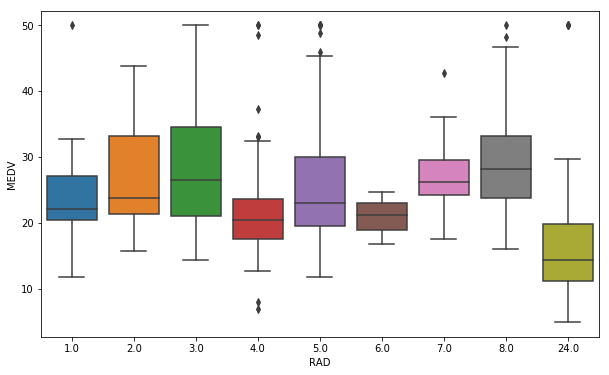

In [42]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(y=y_bos, x=X_bos.RAD)

- RAD 3 has the top housing value compare to others.
- Housing value in RAD 24 is significantly lower than the others.

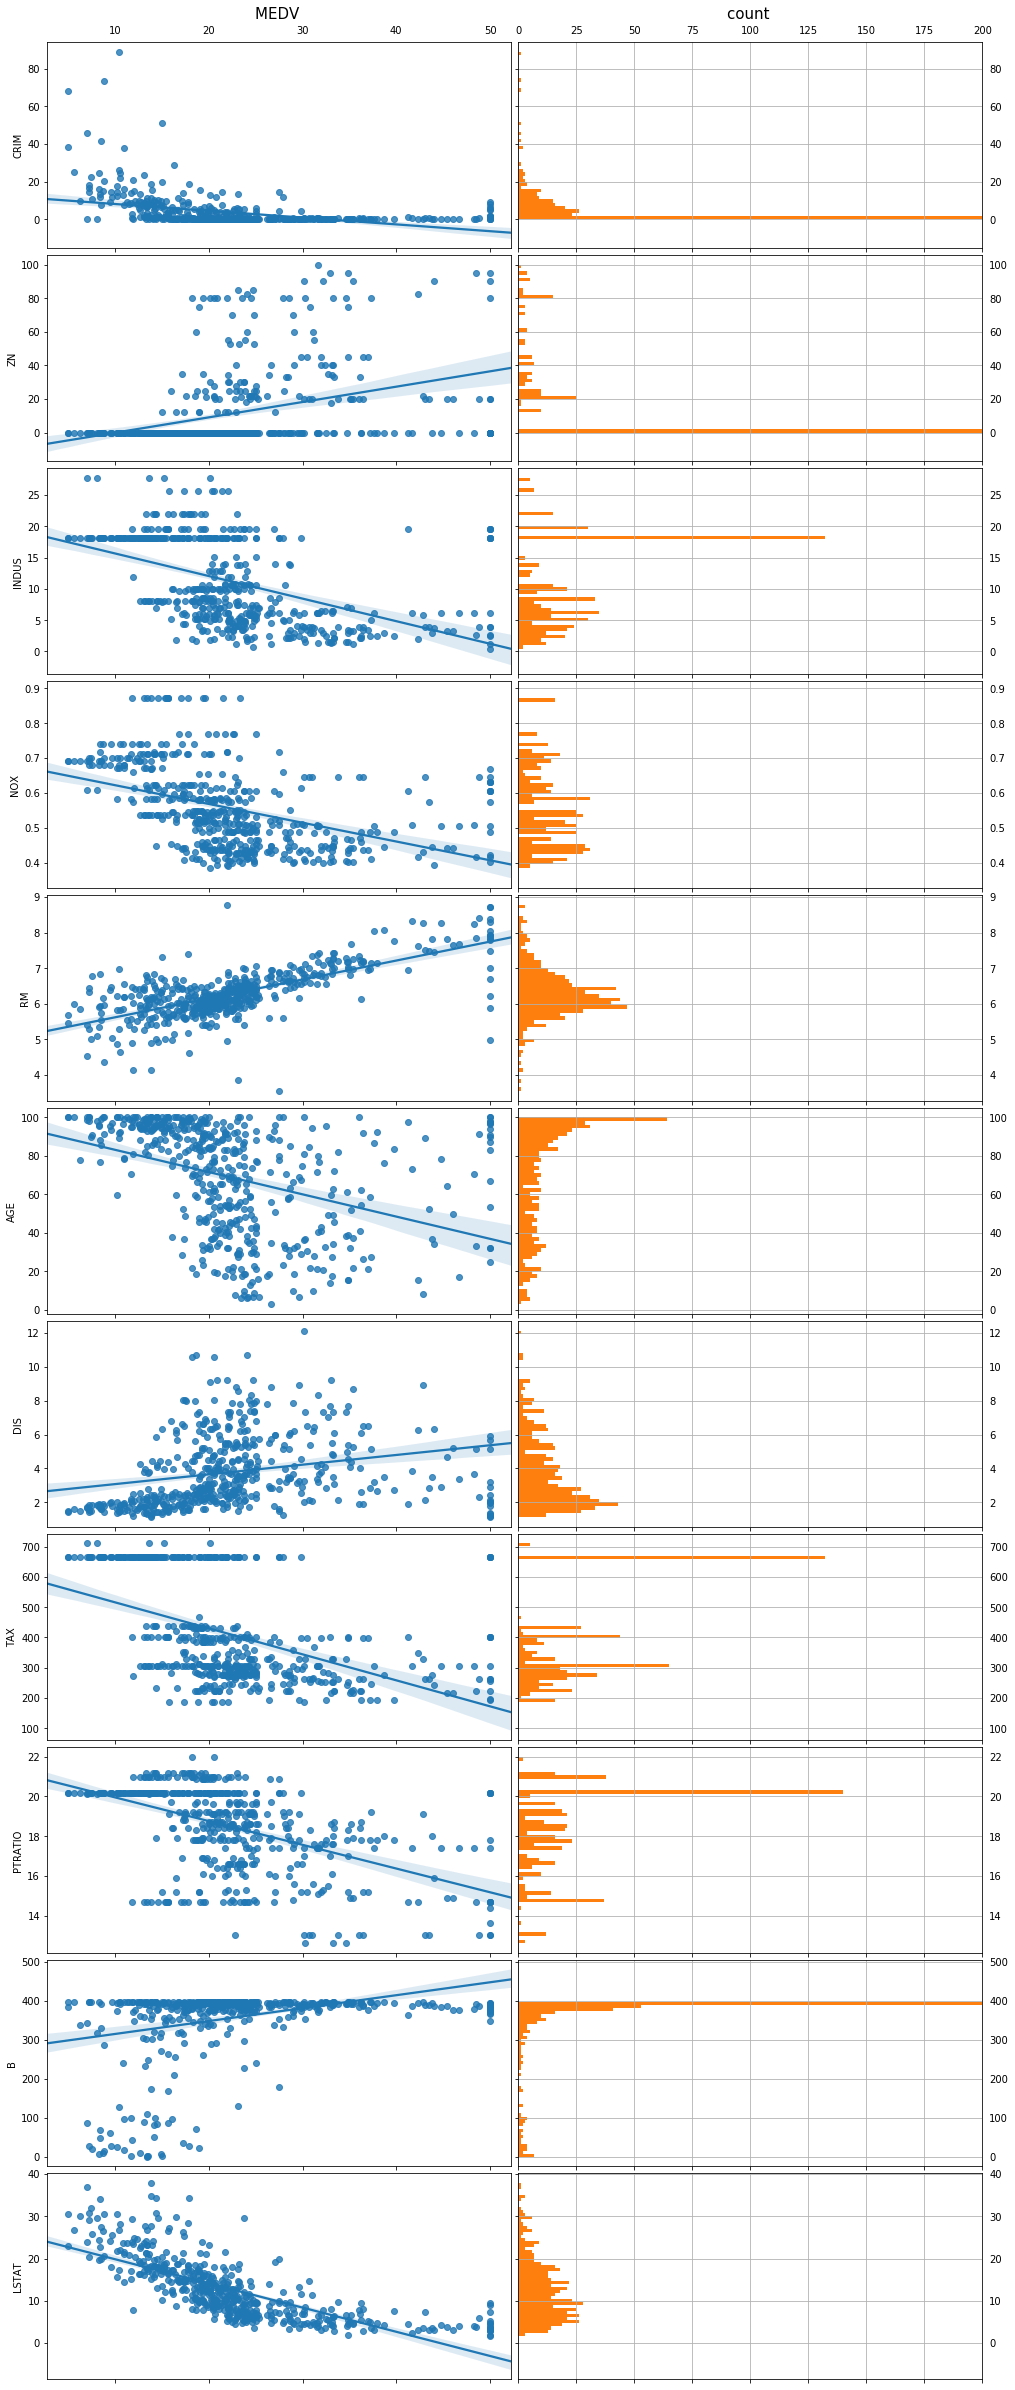

In [43]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt

X_1 = X_bos.drop('CHAS',1).drop('RAD',1)

fig = plt.figure(figsize=(14,33))
gs = gridspec.GridSpec(11, 2)

for i in range(11):
    ax1 = plt.subplot(gs[i,0])
    ax2 = plt.subplot(gs[i,1])    
    sns.regplot(y_bos, X_1.iloc[:,i],ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
    X_1[X_1.columns[i]].hist(bins=50,ax=ax2,orientation='horizontal')    
    ax2.set_ylim((ylim[0], ylim[1]))
    ax2.set_xlabel('')
    ax2.set_xlim((0,200))
    for tick in ax2.yaxis.get_major_ticks():
        tick.label1On = False
        tick.label2On = True
    if i != 0:
        ax1.set_xticklabels([''])
        ax2.set_xticklabels([''])
    else:
        ax1.set_title('MEDV \n',size=15)
        ax2.set_title('count \n',size=15)
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True
        for tick in ax2.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True
plt.tight_layout(pad=0, w_pad=0, h_pad=0)

The graph above shows the distribution of the continuous attributes and their relationship to housing values:

- More than half of CRIM and ZN are concentrate between 0 and 1.
- It is obvious to see he relationship between RM, LSTAT and housing value.
- Some relationships are not that significant, such as CRIM and ZN.

<p><a name="dummy"></a></p>
### Categorical Input Variables

So far all the input variables we’ve seen are continuous variables.
It’s possible that we will have categorical (aka, qualitative) input variables. 

- For example, if we want to explore the relationship between smoking and lung cancer rate, the variable smoking usually has two categories, “yes” and “no”.

- The categorical variables can be effectively coded as integers. For instance [“yes”, “no”] are often coded as [1, 0].

- When there are more than two categories, we cannot simply transfer the variable by adding more integers,  as scikit-learn estimators expect continuous input, and would interpret the categories as being ordered, which is often not desired. 

The most useful and commonly used coding is via dummy variables: a K-level categorical variable is represented by K binary variables, only one of which is on at a time. This is called 1-of-K encoding scheme.

- Scikit-learn provides a class called OneHotEncoder which encode categorical variables using 1-of-K scheme, but it only takes integers as input.

- We will be using `pandas.get_dummies()` function to convert categorical variables.

Example - Assuming a laptop sales data set has a feature called web browser which contains the types of pre installed web browser for 5 different laptop models.


In [44]:
import pandas as pd
browser = pd.Series(["Safari","Chrome", "IE", "IE", "Safari"])
browser_dummy = pd.get_dummies(browser)
browser_dummy

,Chrome,IE,Safari
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1


- In the previous example we generates 3 dummy variables, as the number of categories is 3. For each single record we only have one “1” and the rest are all 0’s.

- We can consider one category as the base and drop it without losing any information since all the dummy variables are mutually exclusive.

- So the following dummy variables will be sufficient.

In [45]:
browser_dummy.drop('Chrome', 1)

,IE,Safari
0,0,1
1,0,0
2,1,0
3,1,0
4,0,1


<p><a name="ex4"></a></p>
#### Exercise: Dummy Variables

To apply multiple linear regression, you’ll need to transform the categorical variable RAD to dummy variables. CHAS is binary and therefore we don’t need to convert it to dummy variables.

- Dummify the RAD column and put it back with the other features.

In [46]:
df = X_bos.copy()

#### Your code here

Below we split the data into **training** set and the **testing** set. Then we will train our models on the training set and evaluate it with the testing set. This is a standard process for model evaluation, which we will discuss with more details in a seperate session.

- Do multiple linear regression with new data set.
- Report the coefficient of determination from the training and testing sets.

In [47]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y_bos, test_size=0.3, random_state=42)

#### Your code here

/Users/lukelin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Solution

In [48]:
### Dummify
rad = pd.get_dummies(df.RAD, prefix='RAD_')
df = pd.concat([df.drop('RAD',1),rad[rad.columns[1:]]],axis=1)
print(rad.head())
pd.DataFrame(df.columns, columns=['Column_Name'])

   RAD__1.0  RAD__2.0  RAD__3.0  RAD__4.0  RAD__5.0  RAD__6.0  RAD__7.0  \
0         1         0         0         0         0         0         0   
1         0         1         0         0         0         0         0   
2         0         1         0         0         0         0         0   
3         0         0         1         0         0         0         0   
4         0         0         1         0         0         0         0   

   RAD__8.0  RAD__24.0  
0         0          0  
1         0          0  
2         0          0  
3         0          0  
4         0          0  


,Column_Name
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,TAX
9,PTRATIO


In [49]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y_bos, test_size=0.3, random_state=42)

### Fitting
ols.fit(X_train, y_train)
print ("R^2 for training set:",)
print (ols.score(X_train, y_train))

print ('-'*50)

print ("R^2 for test set:",)
print (ols.score(X_test, y_test))

colnames = df.columns
result = pd.DataFrame(ols.coef_).transpose()
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

R^2 for training set:
0.7541410999649492
--------------------------------------------------
R^2 for test set:
0.7143358179248874


,coefficient
CRIM,-0.134596
ZN,0.043598
INDUS,0.064662
CHAS,2.923517
NOX,-16.260766
RM,3.947485
AGE,-0.011712
DIS,-1.464337
TAX,-0.005080
PTRATIO,-0.902115


<p><a name="stats"></a></p>
## Statsmodels

Statsmodels is a Python package that provides a complement to scipy for statistical computations including descriptive statistics and estimation of statistical models.

It emplasizes parameter estimation and (statistical) testing. Here we will only give you one example.

In [50]:
import statsmodels.api as sm
model = sm.OLS(adver['Sales'], adver[['TV', 'Radio', 'Newspaper']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Wed, 21 Mar 2018   Prob (F-statistic):          2.43e-171
Time:                        20:54:38   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.0

/Users/lukelin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**Note** The `statsmodels` adapts the notation that `intercept` needs to be added by the method `add_constant`. We know that linear model without the constant can be very biased:

<img src="./pic/slope.png" style="height: 300px; width: 600px;">

In [51]:
x = adver[['TV', 'Radio', 'Newspaper']]
x = sm.add_constant(x)
model = sm.OLS(adver['Sales'], x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           1.58e-96
Time:                        20:54:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0